In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, rc={'text.usetex': True})
sns.set_style("whitegrid")

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [25]:
# scenario = 'noSharing'
# scenario = 'lio'
# scenario = 'evenly'
# scenario = 'preDec'
# scenario = 'share_share0Opposite'
scenario = 'pot'

number_agents = 3
twisted_experiment = False

if number_agents == 2:
    csv = 'clean_up_small/clean_n2_' + scenario + '/'
elif number_agents == 3:
    csv = 'clean_up_big/clean_n3_' + scenario + '/'

In [26]:
def get_env_data(csv):
    experiments = [0, 1, 2, 3, 4]
    for experiment in experiments:
        
        if number_agents == 2:
            path = 'small_n2_lio_' + str(experiment) + '/log.csv'
        elif number_agents == 3:
            path = 'big_n3_lio_' + str(experiment) + '/log.csv'

        csv_exp = csv + path
        
        data = pd.read_csv(csv_exp)

        if number_agents == 2:
            data['A1_share_0'] = 0.5
            data = data[['episode', 'A1_reward_total', 'A2_reward_total', 'A1_waste_cleared', 'A2_waste_cleared', 'A1_share_0']] # 
            data['Reward_acc'] = data['A1_reward_total'] + data['A2_reward_total']        
        elif number_agents == 3:
            data = data[['episode', 'A1_reward_total', 'A2_reward_total', 'A1_waste_cleared', 'A2_waste_cleared', 'A1_share_0', 'A3_reward_total', 'A3_waste_cleared', 'A2_share_0', 'A3_share_0']] # 'A2_share_0', 'A3_share_0'
            data['Reward_acc'] = data['A1_reward_total'] + data['A2_reward_total'] + data['A3_reward_total']

        if twisted_experiment:
            data['A1_share_0'] = 1 - data['A1_share_0'] 

        data['experiment'] = experiment

        if experiment == 0:
            df = pd.DataFrame(data)
        elif experiment != 0:
            df = df.append(data)
    
    df = df.reset_index()
    return df


def plot_reward(df):
    ax = sns.lineplot(data=df,
            x='episode',
            y='Reward_acc', 
            )

    ax.set(xlabel='Episode', ylabel="Rewards accumulated") 
    # plt.tight_layout()
    plt.savefig('NEW_' + str(number_agents) + '-player_ActorCritic_' + scenario + '_reward.png', dpi=400)
    plt.show()
    plt.close()


def plot_share(df):
    ax = sns.lineplot(data=df,
            x='episode',
            y='A1_share_0', 
            )

    ax.set(xlabel='Episode', ylabel="Share in own rewards") 
    plt.savefig('NEW_' + str(number_agents) + '-player_ActorCritic_' + scenario + '_share.png', dpi=400)
    plt.show()
    plt.close()
        
def plot_share_pot(df):
    
    ax = sns.lineplot(data=pd.melt(df[['episode', 'A1_share_0', 'A2_share_0', 'A3_share_0']], ['episode'], var_name='Participation in common pot'), # , 'A3_waste_cleared'
        x = 'episode',
        y = 'value',
        hue = 'Participation in common pot',
        style = 'Participation in common pot',
        )

    ax.set(xlabel='Episode', ylabel="Participation in common pot")
    
    plt.legend(title='Participation', loc='upper left', labels=['Agent 1', 'Agent 2', 'Agent 3'])

    plt.savefig('NEW_' + str(number_agents) + '-player_ActorCritic_' + scenario + '_share.png', dpi=400)

    plt.show()
    plt.close()
    

def plot_waste(df):
    df = pd.DataFrame(df)
    # plt.rcParams["text.usetex"] = False

    if number_agents == 2:
        ax = sns.lineplot(data=pd.melt(df[['episode', 'A1_waste_cleared', 'A2_waste_cleared']], ['episode'], var_name='Waste cleared'),
        x = 'episode',
        y = 'value',
        hue = 'Waste cleared',
        style = 'Waste cleared',
        )
    elif number_agents == 3:
        ax = sns.lineplot(data=pd.melt(df[['episode', 'A1_waste_cleared', 'A2_waste_cleared', 'A3_waste_cleared']], ['episode'], var_name='Waste cleared'),
        x = 'episode',
        y = 'value',
        hue = 'Waste cleared',
        style = 'Waste cleared',
        )

    ax.set(xlabel='Episode', ylabel="Waste cleared") 

    if number_agents == 2:
        plt.legend(title='Waste cleared', loc='upper left', labels=['Agent 1', 'Agent 2'])
    elif number_agents == 3:
        plt.legend(title='Waste cleared', loc='upper left', labels=['Agent 1', 'Agent 2', 'Agent 3'])

    plt.savefig('NEW_' + str(number_agents) + '-player_ActorCritic_' + scenario + '_waste.png', dpi=400)

    plt.show()
    plt.close()


def plot_waste_last(df):
    plt.rcParams["text.usetex"] = False

    if number_agents == 2:
        ax = sns.catplot(data=pd.melt(df[['experiment', 'A1_waste_cleared', 'A2_waste_cleared']], ['experiment'], var_name='Waste cleared'), # , 'A3_waste_cleared'
        x = 'experiment',
        y = 'value',
        hue = 'Waste cleared',
        # style = 'Waste cleared',
        )
    elif number_agents == 3:
        ax = sns.catplot(data=pd.melt(df[['experiment', 'A1_waste_cleared', 'A2_waste_cleared', 'A3_waste_cleared']], ['experiment'], var_name='Waste cleared'), # , 'A3_waste_cleared'
        x = 'experiment',
        y = 'value',
        hue = 'Waste cleared',
        # style = 'Waste cleared',
        )

    ax.set(xlabel='Experiment', ylabel="Waste cleared")

    if number_agents == 2:
        new_labels = ['Agent 1', 'Agent 2']
    elif number_agents == 3:
        new_labels = ['Agent 1', 'Agent 2', 'Agent 3']

    for t, l in zip(ax._legend.texts, new_labels):
        t.set_text(l)

    plt.savefig('NEW_' + str(number_agents) + '-player_ActorCritic_' + scenario + '_waste_lastEp(40000-50000).png', dpi=400)

    plt.show()
    plt.close()

In [27]:
df = get_env_data(csv)
df

,index,episode,A1_reward_total,A2_reward_total,A1_waste_cleared,A2_waste_cleared,A1_share_0,A3_reward_total,A3_waste_cleared,A2_share_0,A3_share_0,Reward_acc,experiment
0,0,1000,0.30,0.300,2.7,1.1,0.4,0.475,0.3,0.2,0.4,1.075,0
1,1,2000,0.10,0.275,1.4,0.1,0.3,0.075,0.7,0.2,0.2,0.450,0
2,2,3000,0.30,0.275,2.3,3.1,0.5,0.625,0.2,0.3,0.3,1.200,0
3,3,4000,0.40,0.000,3.1,1.5,0.3,0.150,0.0,0.4,0.3,0.550,0
4,4,5000,0.00,0.050,1.0,1.1,0.0,0.075,0.0,0.1,0.1,0.125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,45,46000,0.25,0.225,0.1,0.1,0.3,0.025,0.1,0.3,0.4,0.500,4
246,46,47000,0.30,0.450,1.7,1.8,0.3,0.700,0.0,0.2,0.3,1.450,4
247,47,48000,0.35,0.200,2.6,1.6,0.5,0.875,0.0,0.3,0.3,1.425,4
248,48,49000,0.00,0.000,0.8,0.0,0.3,0.000,0.0,0.2,0.2,0.000,4


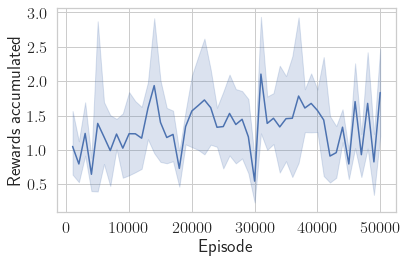

In [28]:
plot_reward(df)

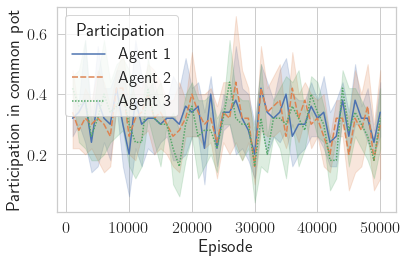

In [29]:
# plot_share(df)
plot_share_pot(df)

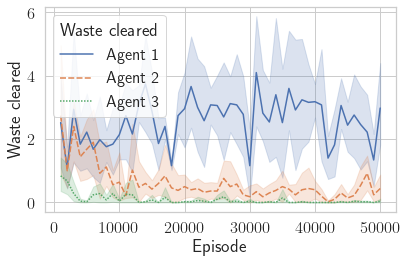

In [30]:
plot_waste(df)

In [31]:
lastEp = df[df['episode'] > 40000] 

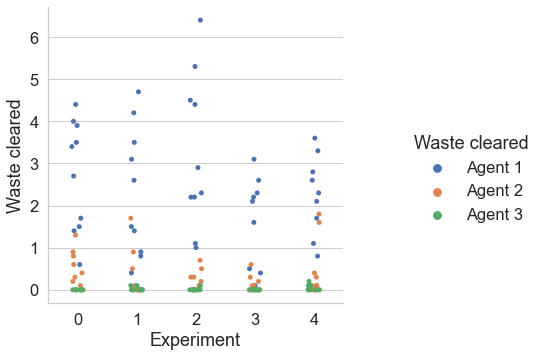

In [32]:
df = lastEp
rcParams.update({'figure.autolayout': False})
plot_waste_last(df)